# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
df = pd.read_csv('CarPrice_Assignment.csv')

# Exploratory data analysis

In [2]:
# Checking the shape
df.shape

(205, 26)

In [3]:
# Checking first 5 rows 
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Checking the datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Let's optimize the memory using appropriate data types
int_cols = df.select_dtypes(include = np.int64)
df[int_cols.columns] = df[int_cols.columns].astype(np.int32)

float_cols = df.select_dtypes(include = np.float64)
df[float_cols.columns] = df[float_cols.columns].astype(np.float32)

In [6]:
# Checking null values
df.isnull().mean()*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [7]:
# Checking any duplicated values
df.duplicated().sum()

0

In [8]:
# For getting descriptive statistical information
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756584,174.049271,65.907806,53.724876,2555.565854,126.907317,3.329756,3.255414,10.142536,104.117073,5125.121951,25.219512,30.751220,13276.710938
std,59.322565,1.245307,6.021776,12.337288,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852051
min,1.000000,-2.000000,86.599998,141.100006,60.299999,47.799999,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300003,64.099998,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.199997,65.500000,54.099998,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400002,183.100006,66.900002,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900002,208.100006,72.300003,59.799999,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<AxesSubplot:>

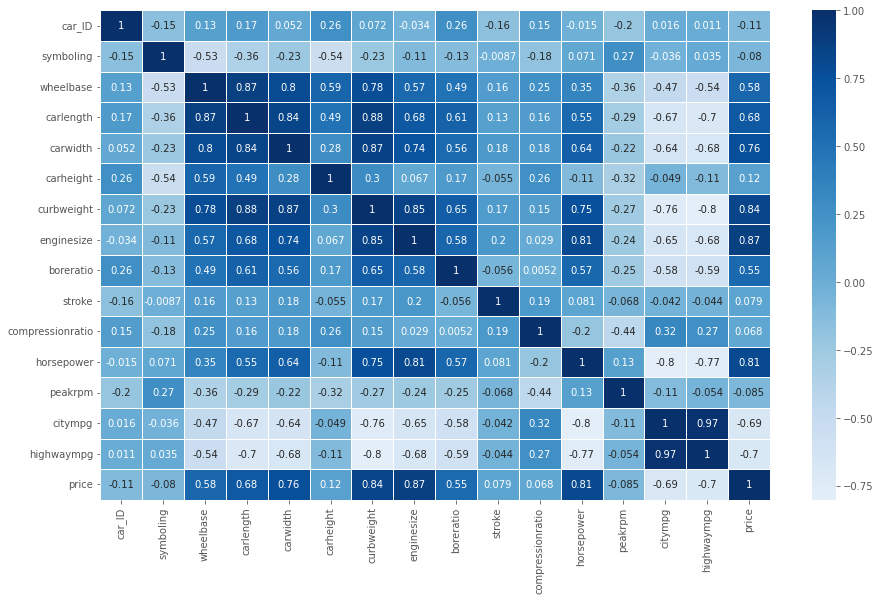

In [9]:
# Let's plot the heatmap to see teh correlation between variables
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(df.corr(),annot=True, cmap="Blues", linewidths=1,ax= ax,center =0)

<AxesSubplot:xlabel='enginesize', ylabel='Density'>

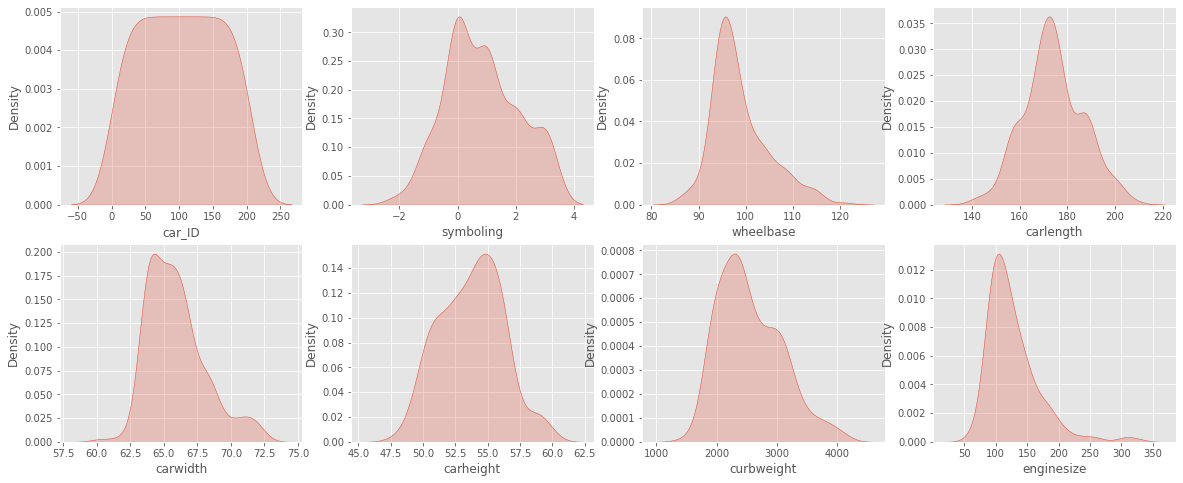

In [10]:
# Let's check the outliers, and for checking the outliers we first need to see the distribution of the every numerical variable
fig,ax = plt.subplots(2,4,figsize = (20,8))

sns.kdeplot(df['car_ID'],shade=True,ax = ax[0][0])
sns.kdeplot(df['symboling'],shade=True,ax = ax[0][1])
sns.kdeplot(df['wheelbase'],shade=True,ax = ax[0][2])
sns.kdeplot(df['carlength'],shade=True,ax = ax[0][3])
sns.kdeplot(df['carwidth'],shade=True,ax = ax[1][0])
sns.kdeplot(df['carheight'],shade=True,ax = ax[1][1])
sns.kdeplot(df['curbweight'],shade=True,ax = ax[1][2])
sns.kdeplot(df['enginesize'],shade=True,ax = ax[1][3])

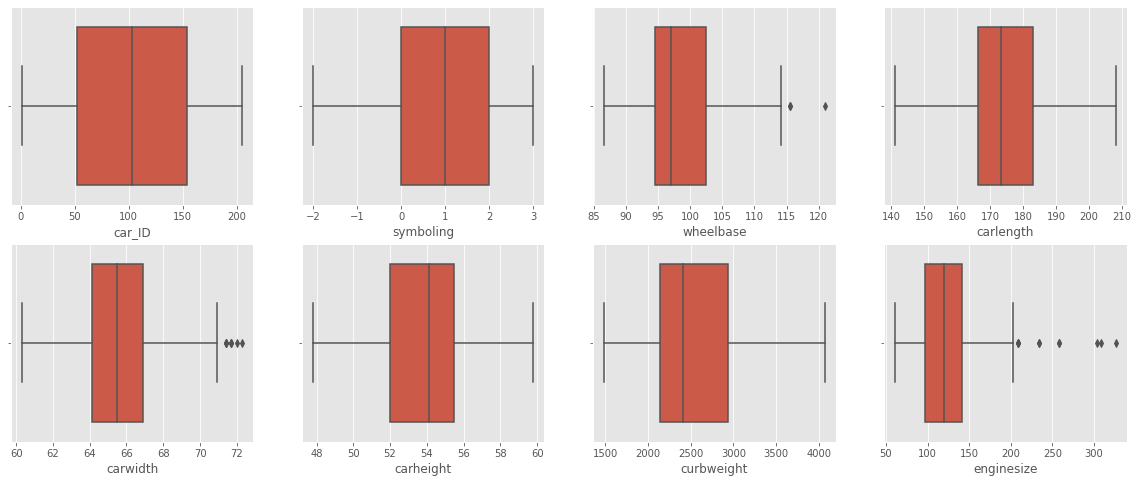

In [11]:
# Let's plot boxplots
fig,ax = plt.subplots(2,4,figsize = (20,8))

sns.boxplot(x = df['car_ID'],ax = ax[0][0])
sns.boxplot(x = df['symboling'],ax = ax[0][1])
sns.boxplot(x = df['wheelbase'],ax = ax[0][2])
sns.boxplot(x = df['carlength'],ax = ax[0][3])
sns.boxplot(x = df['carwidth'],ax = ax[1][0])
sns.boxplot(x = df['carheight'],ax = ax[1][1])
sns.boxplot(x = df['curbweight'],ax = ax[1][2])
sns.boxplot(x = df['enginesize'],ax = ax[1][3])
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

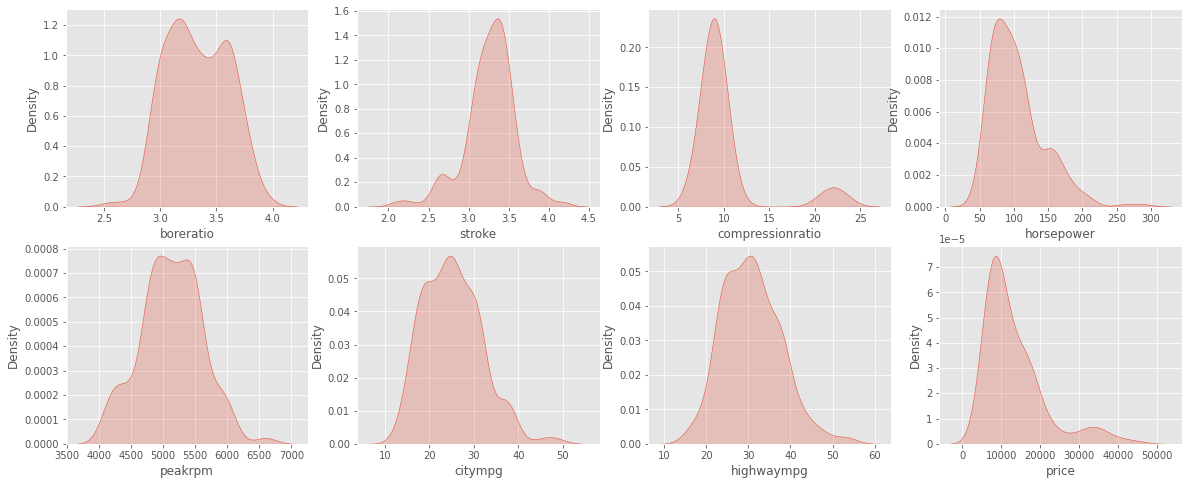

In [12]:
fig,ax = plt.subplots(2,4,figsize = (20,8))

sns.kdeplot(df['boreratio'],shade=True,ax = ax[0][0])
sns.kdeplot(df['stroke'],shade=True,ax = ax[0][1])
sns.kdeplot(df['compressionratio'],shade=True,ax = ax[0][2])
sns.kdeplot(df['horsepower'],shade=True,ax = ax[0][3])
sns.kdeplot(df['peakrpm'],shade=True,ax = ax[1][0])
sns.kdeplot(df['citympg'],shade=True,ax = ax[1][1])
sns.kdeplot(df['highwaympg'],shade=True,ax = ax[1][2])
sns.kdeplot(df['price'],shade=True,ax = ax[1][3])

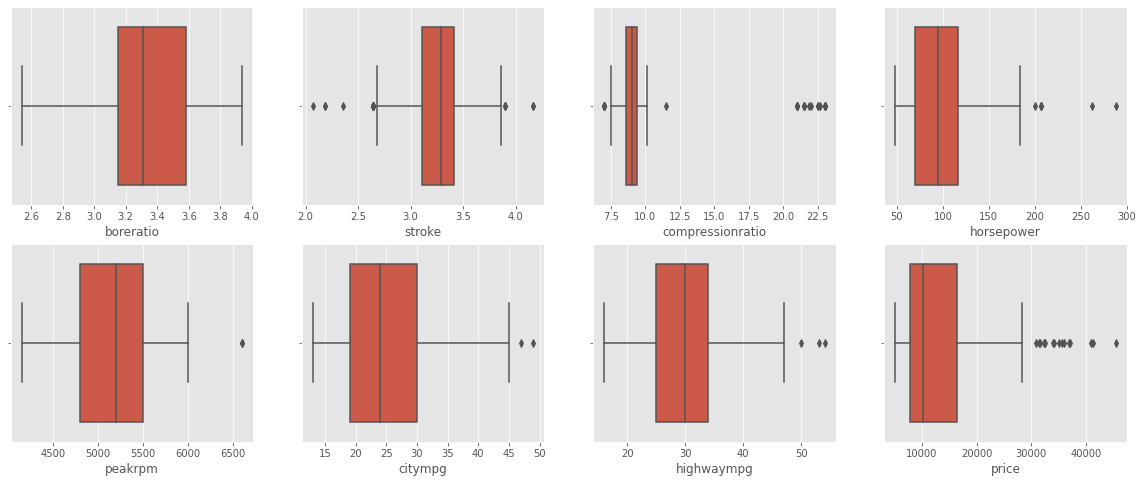

In [13]:
# Let's plot boxplots
fig,ax = plt.subplots(2,4,figsize = (20,8))

sns.boxplot(x = df['boreratio'],ax = ax[0][0])
sns.boxplot(x = df['stroke'],ax = ax[0][1])
sns.boxplot(x = df['compressionratio'],ax = ax[0][2])
sns.boxplot(x = df['horsepower'],ax = ax[0][3])
sns.boxplot(x = df['peakrpm'],ax = ax[1][0])
sns.boxplot(x = df['citympg'],ax = ax[1][1])
sns.boxplot(x = df['highwaympg'],ax = ax[1][2])
sns.boxplot(x = df['price'],ax = ax[1][3])
plt.show()

# Data cleaning

Out of all the numerical features below mentioned features have outliers 
1. enginesize 
2. horsepower
3. peakrpm
4. citympg 
5. highwaympg 👉 Sort of normal distribution
6. wheelbase
7. carlength
8. carwidth
9. stroke
10. compressionratio
11. price 

Now to handle these outliers we will use the z score method for those features which have normal or sort of normal distribution whereas for the features whcih have skewness we will use the quartile method.

In [14]:
# Let's create a copy of the dataframe so that we could compare before and after handling outliers.
temp_df = df.copy()

In [15]:
# let's create a function to find the lower and upper limit 
def find_upper_and_lower_lmt(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3-q1
    Upper_lmt = q3 + (1.5*IQR)
    Lower_lmt = q1 - (1.5*IQR)
    return [Upper_lmt,Lower_lmt]

In [16]:
# List of all columns in which there are some outliers
cols_with_outliers = ['enginesize','horsepower','peakrpm', 'citympg', 'highwaympg','price','wheelbase','carlength',
                      'carwidth','stroke','compressionratio']

In [17]:
# Let's cap the outliers
for col in cols_with_outliers:
    lmts = find_upper_and_lower_lmt(temp_df[col])
    temp_df[col] = np.where(temp_df[col] > lmts[0],lmts[0],
    np.where(
        temp_df[col] < lmts[1],lmts[1],temp_df[col] ))

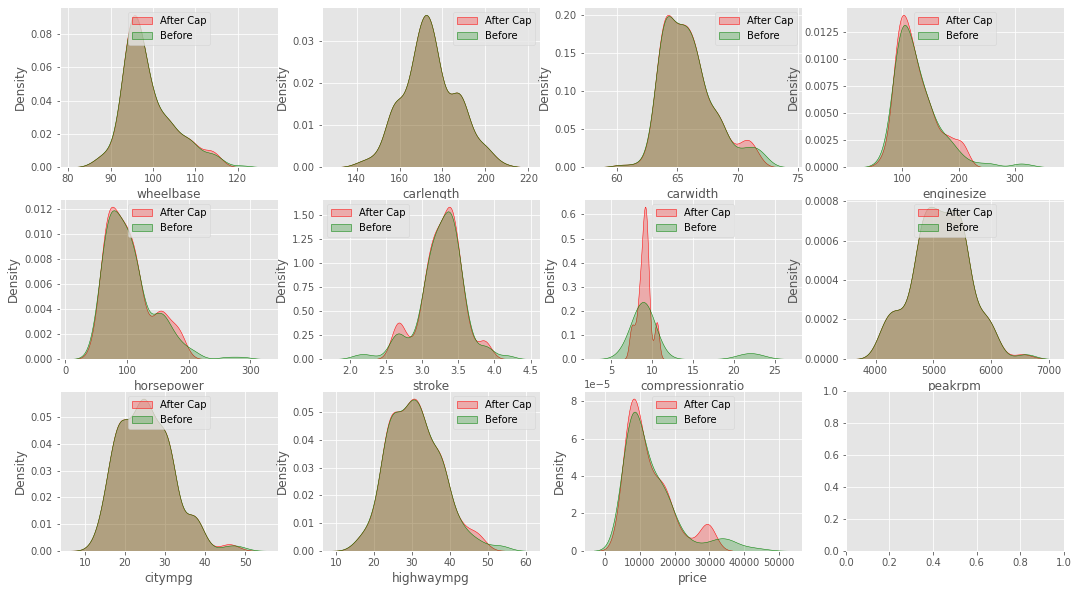

In [18]:
# Let's check the change in distribution before and after capping
fig,ax = plt.subplots(3,4,figsize = (18,10))

sns.kdeplot(temp_df['wheelbase'],shade = True,ax = ax[0][0] ,color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['wheelbase'],shade = True,ax = ax[0][0],color = 'green',label='Before').legend(loc='upper center')

sns.kdeplot(temp_df['carlength'],shade = True,ax = ax[0][1],color = 'red',label='After Cap').legend(loc='upper right')
sns.kdeplot(df['carlength'],shade = True,ax = ax[0][1],color = 'green',label='Before').legend(loc='upper right')

sns.kdeplot(temp_df['carwidth'],shade = True,ax = ax[0][2],color = 'red',label='After Cap').legend(loc='upper right')
sns.kdeplot(df['carwidth'],shade = True,ax = ax[0][2],color = 'green',label='Before').legend(loc='upper right')

sns.kdeplot(temp_df['enginesize'],shade = True,ax = ax[0][3],color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['enginesize'],shade = True,ax = ax[0][3],color = 'green',label='Before').legend(loc='upper center')

sns.kdeplot(temp_df['horsepower'],shade = True,ax = ax[1][0],color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['horsepower'],shade = True,ax = ax[1][0],color = 'green',label='Before').legend(loc='upper center')

sns.kdeplot(temp_df['stroke'],shade = True,ax = ax[1][1],color = 'red',label='After Cap').legend(loc='upper left')
sns.kdeplot(df['stroke'],shade = True,ax = ax[1][1],color = 'green',label='Before').legend(loc='upper left')

sns.kdeplot(temp_df['compressionratio'],ax = ax[1][2],shade=True,color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['compressionratio'],shade=True,ax = ax[1][2],color = 'green',label='Before').legend(loc='upper center')

sns.kdeplot(temp_df['peakrpm'],shade = True,ax = ax[1][3],color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['peakrpm'],shade = True,ax = ax[1][3],color = 'green',label='Before').legend(loc='upper center')

sns.kdeplot(temp_df['citympg'],shade = True,ax = ax[2][0],color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['citympg'],shade = True,ax = ax[2][0],color = 'green',label='Before').legend(loc='upper center')

sns.kdeplot(temp_df['highwaympg'],shade = True,ax = ax[2][1],color = 'red',label='After Cap').legend(loc='upper right')
sns.kdeplot(df['highwaympg'],shade = True,ax = ax[2][1],color = 'green',label='Before').legend(loc='upper right')

sns.kdeplot(temp_df['price'],shade = True,ax = ax[2][2],color = 'red',label='After Cap').legend(loc='upper center')
sns.kdeplot(df['price'],shade = True,ax = ax[2][2],color = 'green',label='Before').legend(loc='upper center')

In stroke, enginesize, stroke, compressionratio and price features the distribution seems to change a bit more thus let's try removing the outliers

In [19]:
# Creating a temporary data frame to first test the distribution by removing the outliers
Temp_df = df.copy()

In [20]:
# Let's remove the outliers
remove_outliers_cols = ['price','stroke','compressionratio','enginesize']
for col in remove_outliers_cols:
    lmts = find_upper_and_lower_lmt(Temp_df[col])
    Temp_df[col] = Temp_df[col][(Temp_df[col] < lmts[0]) & (Temp_df[col] > lmts[1])]

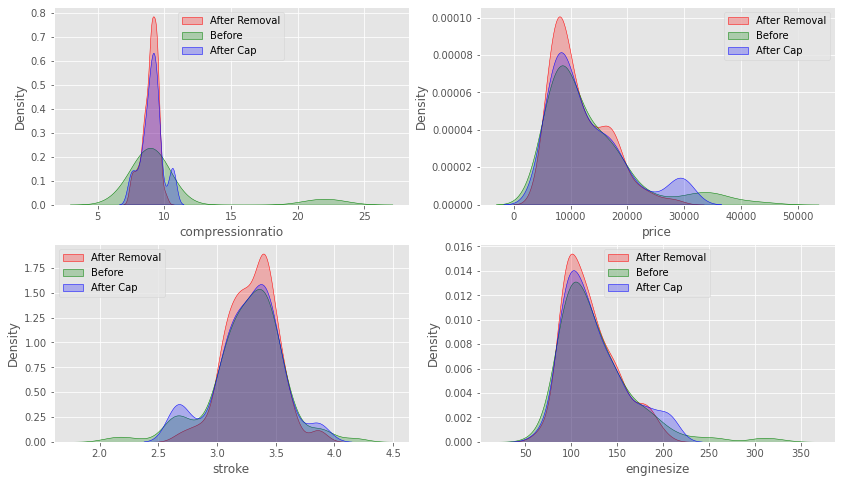

In [21]:
# Let's check the change in distribution before and after removing the outliers
fig,ax = plt.subplots(2,2,figsize = (14,8))

sns.kdeplot(Temp_df['compressionratio'],shade = True,ax = ax[0][0] ,color = 'red',label='After Removal').legend(loc='upper center')
sns.kdeplot(df['compressionratio'],shade = True,ax = ax[0][0],color = 'green',label='Before').legend(loc='upper center')
sns.kdeplot(temp_df['compressionratio'],ax = ax[0][0],shade=True,color = 'blue',label='After Cap').legend(loc='upper center')

sns.kdeplot(Temp_df['price'],shade = True,ax = ax[0][1],color = 'red',label='After Removal').legend(loc='upper right')
sns.kdeplot(df['price'],shade = True,ax = ax[0][1],color = 'green',label='Before').legend(loc='upper right')
sns.kdeplot(temp_df['price'],shade = True,ax = ax[0][1],color = 'blue',label='After Cap').legend(loc='upper right')

sns.kdeplot(Temp_df['stroke'],shade = True,ax = ax[1][0],color = 'red',label='After Removal').legend(loc='upper left')
sns.kdeplot(df['stroke'],shade = True,ax = ax[1][0],color = 'green',label='Before').legend(loc='upper left')
sns.kdeplot(temp_df['stroke'],shade = True,ax = ax[1][0],color = 'blue',label='After Cap').legend(loc='upper left')

sns.kdeplot(Temp_df['enginesize'],shade = True,ax = ax[1][1],color = 'red',label='After Removal').legend(loc='upper center')
sns.kdeplot(df['enginesize'],shade = True,ax = ax[1][1],color = 'green',label='Before').legend(loc='upper center')
sns.kdeplot(temp_df['enginesize'],shade = True,ax = ax[1][1],color = 'blue',label='After Cap').legend(loc='upper center')

As we can see that in all the feature after removing outliers the distribution is chaning more than capping,thus we will cap all features in which there are some outliers

In [22]:
# Let's cap the outliers in the original dataframe
for col in cols_with_outliers:
    lmts = find_upper_and_lower_lmt(df[col])
    df[col] = np.where(df[col] > lmts[0],lmts[0],
    np.where(
        df[col] < lmts[1],lmts[1],df[col] ))

<AxesSubplot:>

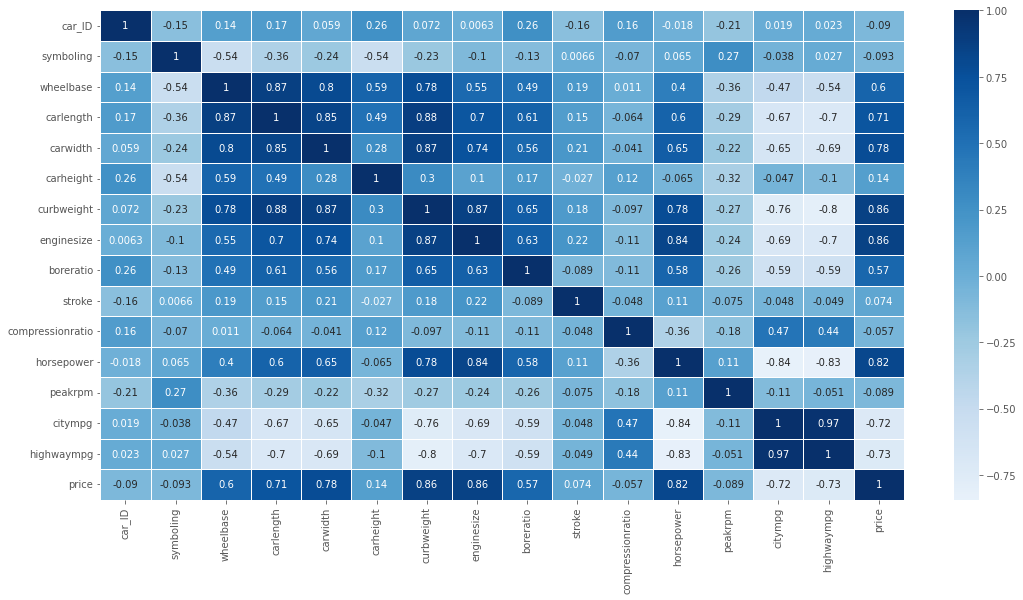

In [23]:
# Let's check the correlation between the variables after dealing with missing values and outliers
fig, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(df.corr(),annot=True, cmap="Blues", linewidths=1,ax= ax,center =0)

After removing the outliers, the correlation between the variables have increased as compared to the original dataframe

# Feature engineering
In this phase we will encode categorical variables, but for donig that first we must be aware about meaning of every categorical variable, so explanation is down below

1. **Aspiration** in cars refers to the process by which air is drawn into an internal combustion engine to support combustion of fuel. There are two types of aspiration systems in cars: naturally aspirated and forced aspiration (also known as turbocharging or supercharging). In a naturally aspirated engine, air is drawn in through the engine's intake system by atmospheric pressure. In a forced aspiration system, a device such as a turbocharger or a supercharger is used to compress air and deliver more oxygen to the engine, resulting in increased power and efficiency.

In [24]:
# Droping the unnecessary feature
df.drop(['car_ID'],axis=1,inplace=True)

In [25]:
# Let's derive brand names from the CarName feature
df['Brand'] = [item.split(' ')[0] for item in df['CarName']] 
df.drop(['CarName'],axis=1,inplace=True)

In [26]:
# Transforming wrong brand names to correct ones
df['Brand'].replace(to_replace = 'maxda',value='mazda',inplace=True)
df['Brand'].replace(to_replace = 'porcshce',value='porsche',inplace=True)
df['Brand'].replace(to_replace = 'nissan',value='Nissan',inplace=True)
df['Brand'].replace(to_replace = ['vokswagen','vw'],value='volkswagen',inplace=True)
df['Brand'].replace(to_replace = 'toyouta',value='toyota',inplace=True)

<AxesSubplot:xlabel='price', ylabel='enginelocation'>

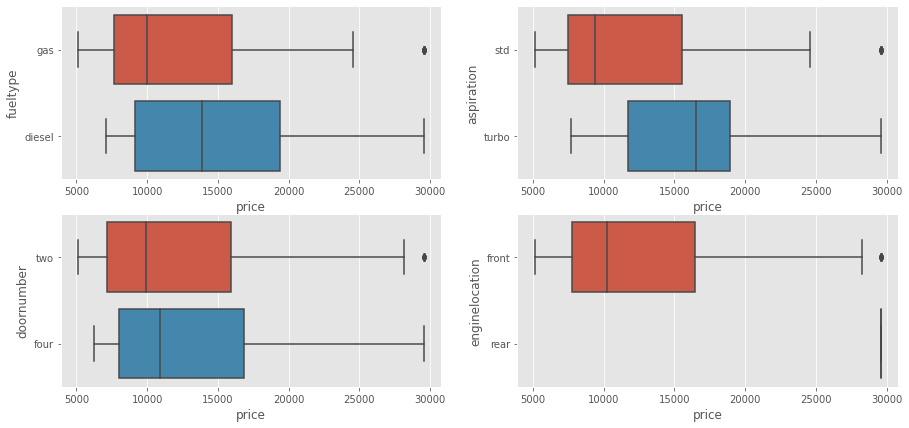

In [27]:
fig,ax = plt.subplots(2,2,figsize=(15,7))

sns.boxplot(x=df['price'], y=df['fueltype'], data=df,orient='h',ax = ax[0][0])
sns.boxplot(x=df['price'], y=df['aspiration'], data=df,orient='h',ax = ax[0][1])
sns.boxplot(x=df['price'], y=df['doornumber'], data=df,orient='h',ax = ax[1][0])
sns.boxplot(x=df['price'], y=df['enginelocation'], data=df,orient='h',ax = ax[1][1])

# sns.boxplot(x=df['price'], y=df['carbody'], data=df,orient='h',ax = ax[1][1])
# sns.boxplot(x=df['price'], y=df['drivewheel'], data=df,orient='h',ax = ax[2][0])


In [28]:
# Ordinal Encoding the features
map_asp = {'std':0,'turbo':1}
map_fuel = {'gas':0,'diesel':1}
map_eng_loc = {'front':0,'rear':1}
map_cylinder_num = {'two':0,'three':1,'four':2,'five':3,'six':4,'eight':5,'twelve':6}


df['cylindernumber'] = df['cylindernumber'].map(map_cylinder_num)
df['enginelocation'] = df['enginelocation'].map(map_eng_loc)
df['aspiration'] = df['aspiration'].map(map_asp)
df['fueltype'] = df['fueltype'].map(map_fuel)

In [29]:
df.head(4)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,3,0,0,two,convertible,rwd,0,88.599998,168.800003,64.099998,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,alfa-romero
1,3,0,0,two,convertible,rwd,0,88.599998,168.800003,64.099998,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,alfa-romero
2,1,0,0,two,hatchback,rwd,0,94.500000,171.199997,65.500000,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,alfa-romero
3,2,0,0,four,sedan,fwd,0,99.800003,176.600006,66.199997,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,audi


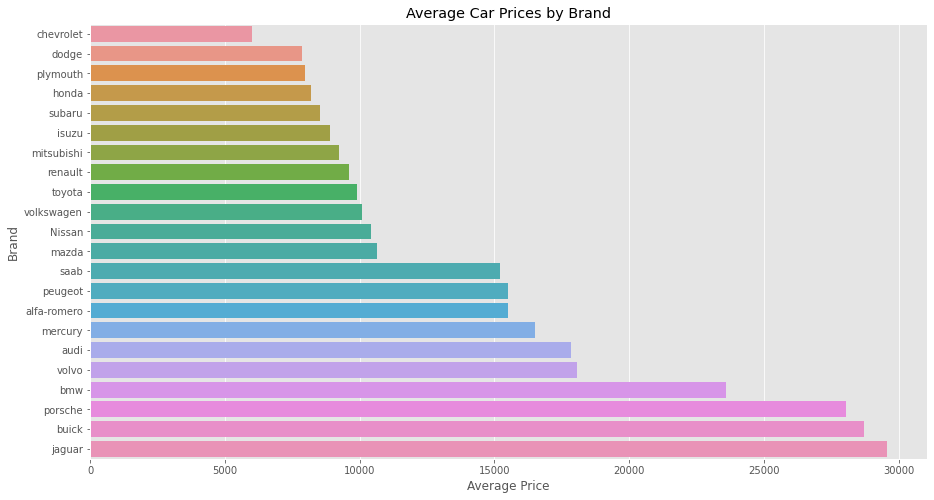

In [30]:
# Calculate the average price by brand
brand_prices = df.groupby('Brand').mean()['price']
brand_prices = brand_prices.sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(15,8))

# Create a bar plot of average prices by brand
sns.barplot(x=brand_prices.values, y=brand_prices.index)

# Add a title and labels for the x and y axes
plt.title("Average Car Prices by Brand")
plt.xlabel("Average Price")
plt.ylabel("Brand")

# Show the plot
plt.show()

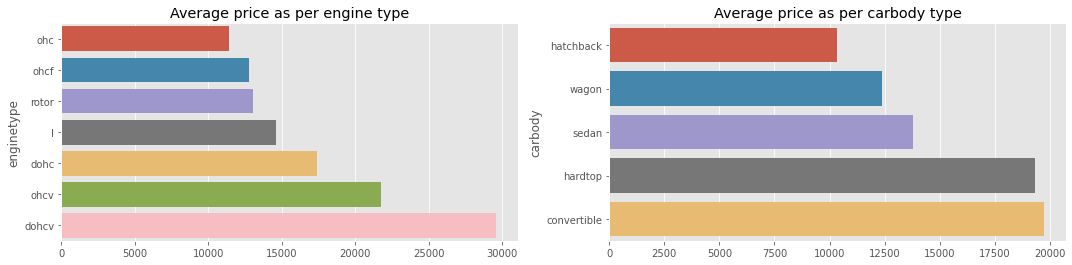

In [31]:
# Calculate the average price by engine type
eng_type_prices = df.groupby('enginetype').mean()['price']
eng_type_prices = eng_type_prices.sort_values(ascending=True)

carbody_prices = df.groupby('carbody').mean()['price']
carbody_prices = carbody_prices.sort_values(ascending=True)

fig, ax = plt.subplots(1,2,figsize=(18,4))

# Create a bar plot of average prices by car body type
sns.barplot(x=eng_type_prices.values, y=eng_type_prices.index,ax = ax[0]).set(title='Average price as per engine type')
sns.barplot(x=carbody_prices.values, y=carbody_prices.index,ax = ax[1]).set(title='Average price as per carbody type')

# Show the plot
plt.show()

In [32]:
# Based on our analysis let's encode the categorical values
map_eng_type = {'ohc':0,'ohcf':1,'rotor':2,'l':3,'dohc':4,'ohcv':5,'dohcv':6}
map_carbody = {'hatchback':0,'wagon':1,'sedan':2,'hardtop':3,'convertible':4}

df['enginetype'] = df['enginetype'].map(map_eng_type)
df['carbody'] = df['carbody'].map(map_carbody)

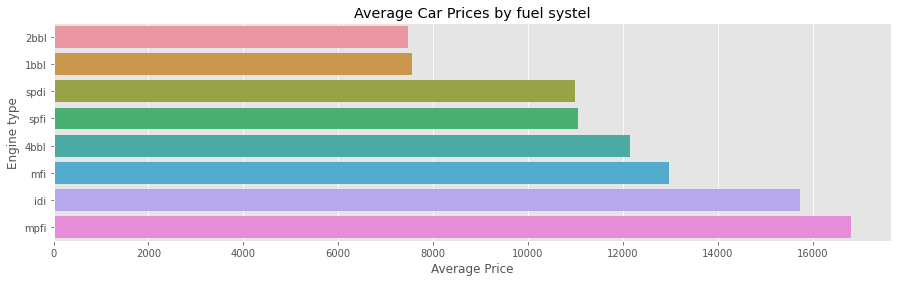

In [33]:
fuel_sys_prices = df.groupby('fuelsystem').mean()['price']
fuel_sys_prices = fuel_sys_prices.sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(15,4))

# Create a bar plot of average prices by brand
sns.barplot(x=fuel_sys_prices.values, y=fuel_sys_prices.index)

# Add a title and labels for the x and y axes
plt.title("Average Car Prices by fuel systel")
plt.xlabel("Average Price")
plt.ylabel("Engine type")

# Show the plot
plt.show()

In [34]:
map_fuel_sys = {'2bbl':0,'1bbl':1,'spdi':2,'spfi':3,'4bbl':4,'mfi':5,'idi':6,'mpfi':7}
df['fuelsystem'] = df['fuelsystem'].map(map_fuel_sys)

<AxesSubplot:ylabel='drivewheel'>

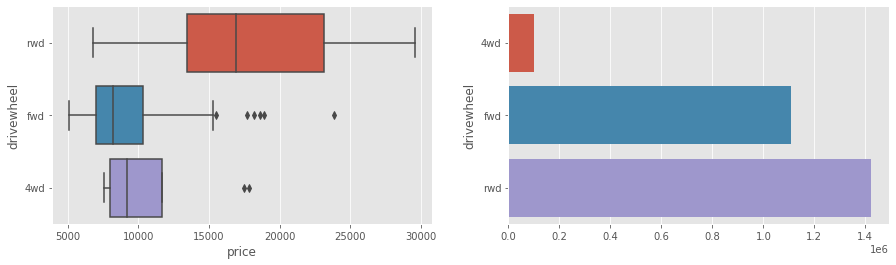

In [35]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
drive_wheel = df.groupby('drivewheel').sum()['price']
drive_wheel = drive_wheel.sort_values(ascending=True)

sns.boxplot(x = df['price'],y = df['drivewheel'],data = df,ax = ax[0])
sns.barplot(x = drive_wheel.values ,y = drive_wheel.index,ax = ax[1])

In [36]:
map_drive_wheel = {'4wd':0,'fwd':1,'rwd':2}
df['drivewheel'] = df['drivewheel'].map(map_drive_wheel)

<AxesSubplot:ylabel='doornumber'>

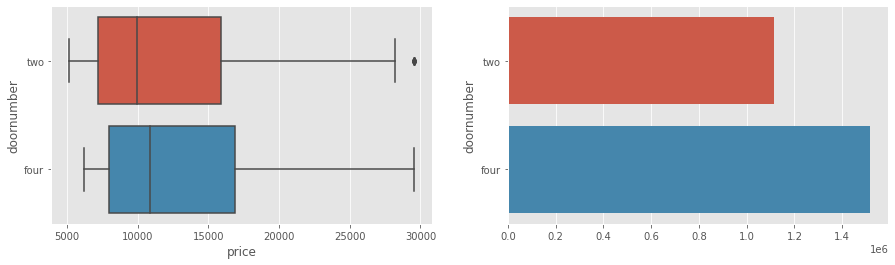

In [37]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
door_num = df.groupby('doornumber').sum()['price']
door_num = door_num.sort_values(ascending=True)

sns.boxplot(x = df['price'],y = df['doornumber'],data = df,ax = ax[0])
sns.barplot(x = door_num.values ,y = door_num.index,ax = ax[1])

Even though our data is saying that cars with 4 doors are more expensive but since the data is less and in real world cars with 2 doors are always more expensive thus we will do ordinal encoding of doornumbers as two:1 and four:0

In [38]:
# Ordinal encoding the door number feature
map_door_num = {'four':0,'two':1}
df['doornumber'] = df['doornumber'].map(map_door_num)

<AxesSubplot:>

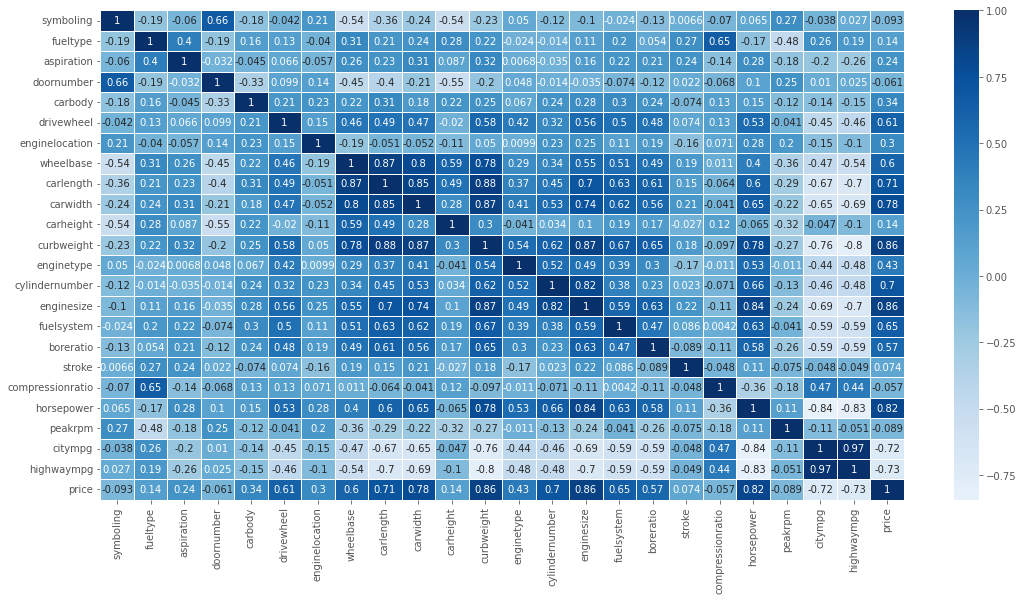

In [39]:
fig, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(df.corr(),annot=True, cmap="Blues", linewidths=1,ax= ax,center =0)

In [40]:
# Dropping the featurs which are weakly correlated to the target variable and other variables as well
df.drop(['symboling','stroke','compressionratio','peakrpm','doornumber'],axis = 1,inplace=True)

In [41]:
# One hot encoding
df = pd.get_dummies(data = df, columns = ['Brand'],sparse=True,drop_first=True)

In [42]:
# Let's do train test split
y = df['price']
X = df.drop(['price'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
cols = X_train.columns

In [44]:
# Let's now do the feature scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating dataframes
X_train = pd.DataFrame(X_train,columns = cols)
X_test = pd.DataFrame(X_test,columns = cols)

C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


# Training the model

There are several algorithms that can be used for solving regression problems. Here are some commonly used ones:

Linear Regression: Linear regression is a simple algorithm used to model the relationship between a dependent variable and one or more independent variables. It involves finding the line of best fit that can best describe the relationship between the variables.

Decision Trees: Decision trees are a non-parametric algorithm that can be used for regression problems. They involve partitioning the data into smaller subsets based on the values of the independent variables, and then predicting the value of the dependent variable for each subset.

Random Forest: Random forest is an ensemble learning algorithm that uses multiple decision trees to make predictions. It involves building multiple decision trees on different subsets of the data and then combining the predictions of all the trees to make a final prediction.

Support Vector Regression (SVR): Support vector regression is a machine learning algorithm used for regression problems. It involves finding the hyperplane that can best separate the data into different classes, and then using this hyperplane to make predictions.

Gradient Boosting: Gradient boosting is a machine learning algorithm that involves building a series of weak models and then combining them to make a final prediction. It involves minimizing the error between the predictions and the actual values by updating the model parameters in an iterative manner.

In [45]:
# Creating an object of LinearRegression class
lr = LinearRegression()

In [46]:
# Training the model
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
# Making predictions
y_pred = lr.predict(X_test)

# Model evalution

In [48]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 1245.9456088786596
MSE 2849014.707845472
R2 score 0.9365177813447481
